# 第二章 引言
## 来自bit.ly 的1.usa.gov数据

In [83]:
import json
import math
path = "dataset/usagov_bitly_data2013-05-17-1368832207"
records= [json.loads(line) for line in open(path)]

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [7]:
len(time_zones)

3839

In [8]:
len(records)

3959

In [9]:
from collections import defaultdict
def get_counts(seq):
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

def get_counts2(seq):
    counts = defaultdict(int)
    for x in seq:
        counts[x]  += 1
    return counts


In [10]:
def top_counts(count_ditc, n=10):
    value_key_paris = [(val, key) for key,val in count_ditc.items()]
    value_key_paris.sort()
    return value_key_paris[-n:]

In [11]:
counts = get_counts2(time_zones)
counts = get_counts(time_zones)

In [12]:
top_counts(counts)

[(40, 'America/Phoenix'),
 (50, 'America/Indianapolis'),
 (85, 'Europe/London'),
 (89, 'America/Denver'),
 (102, 'Asia/Tokyo'),
 (184, 'America/Puerto_Rico'),
 (421, 'America/Los_Angeles'),
 (636, ''),
 (686, 'America/Chicago'),
 (903, 'America/New_York')]

In [13]:
from collections import Counter
counter = Counter(time_zones)
counter.most_common(10)

[('America/New_York', 903),
 ('America/Chicago', 686),
 ('', 636),
 ('America/Los_Angeles', 421),
 ('America/Puerto_Rico', 184),
 ('Asia/Tokyo', 102),
 ('America/Denver', 89),
 ('Europe/London', 85),
 ('America/Indianapolis', 50),
 ('America/Phoenix', 40)]

In [14]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
frame = DataFrame(records)

In [15]:
tz_count = frame['tz'].value_counts()
type(tz_count)

pandas.core.series.Series

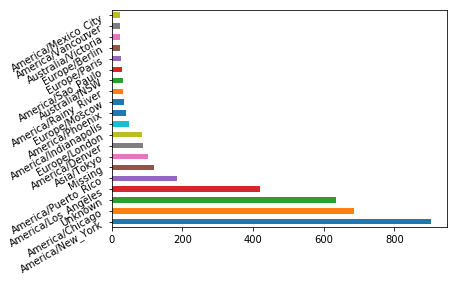

In [16]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = "Unknown"
tz_counter = clean_tz.value_counts()
tz_counter[:20].plot(kind="barh", rot=30)

In [17]:
browser = Series([x.split()[0] for x in frame.a.dropna()])

In [18]:
cframe = frame[frame.a.notnull()]
operation_system = np.where(cframe['a'].
                           str.contains('Windows'), 'Windows', 'Not Windows')

In [19]:
operation_system

array(['Not Windows', 'Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Not Windows'], dtype='<U11')

In [20]:
by_tz_os = cframe.groupby(['tz', operation_system])

In [21]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [22]:
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)[-10:]

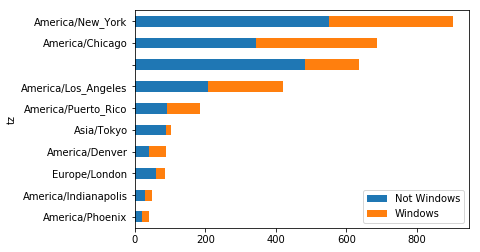

In [23]:
count_subset.plot(kind="barh",stacked=True)

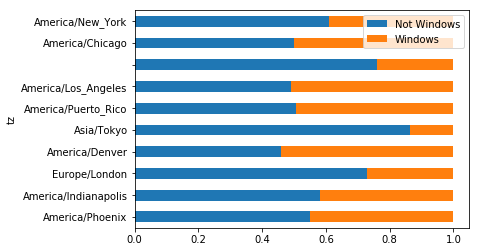

In [24]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind="barh", stacked = True)

## MovieLens 1m Dataset

In [42]:
import pandas as pd
uname = ['user_id', 'gender', 'age', 'occipation', 'zip']
users = pd.read_table(
    'dataset/ml-1m/users.dat',
    sep='::',
    header=None,
    names=uname,
    engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(
    'dataset/ml-1m/ratings.dat',
    sep="::",
    header=None,
    names=rnames,
    engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(
    'dataset/ml-1m/movies.dat',
    sep="::",
    header=None,
    names=mnames,
    engine='python')

In [43]:
print(users.columns)
print(ratings.columns)
print(movies.columns)

Index(['user_id', 'gender', 'age', 'occipation', 'zip'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')
Index(['movie_id', 'title', 'genres'], dtype='object')


In [45]:
data = pd.merge(pd.merge(users, ratings), movies)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occipation    1000209 non-null int64
zip           1000209 non-null object
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [58]:
mean_ratings = data.pivot_table(
    'rating', index='title', columns='gender', aggfunc='mean')

In [59]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [66]:
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [69]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [88]:
mean_ratings['diff'] = abs(mean_ratings['M'] - mean_ratings['F'])
mean_ratings.sort_values(
    by='diff', inplace=True, ascending=False)
mean_ratings[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224


In [106]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False, inplace=True)
rating_std_by_title[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 1880 -- 2010 年全美婴儿姓名

In [137]:
import os
path = 'dataset/pydata-book-2nd-edition/datasets/babynames/'
data = pd.read_csv(path + "yob1880.txt")
data.cumsum()

,Mary,F,7065
0,Anna,F,2604
1,AnnaEmma,FF,4607
2,AnnaEmmaElizabeth,FFF,6546
3,AnnaEmmaElizabethMinnie,FFFF,8292
4,AnnaEmmaElizabethMinnieMargaret,FFFFF,9870
5,AnnaEmmaElizabethMinnieMargaretIda,FFFFFF,11342
6,AnnaEmmaElizabethMinnieMargaretIdaAlice,FFFFFFF,12756
7,AnnaEmmaElizabethMinnieMargaretIdaAliceBertha,FFFFFFFF,14076
8,AnnaEmmaElizabethMinnieMargaretIdaAliceBerthaS...,FFFFFFFFF,15364
9,AnnaEmmaElizabethMinnieMargaretIdaAliceBerthaS...,FFFFFFFFFF,16622


In [135]:
data

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578
5,Ida,F,1472
6,Alice,F,1414
7,Bertha,F,1320
8,Sarah,F,1288
9,Annie,F,1258
